## 1.프로젝트

목표 : 불 gif 파일에 각 프레임에 bicubic interpolation, SRGAN을 적용하여 확대/선명한 이미지를 생성해보자

In [1]:
# 필요한 패키지 불러오기
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
# 학습된 모델 load
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

# 선택한 gif 파일 경로설정 및 load
gif = cv2.VideoCapture("/home/aiffel-dj25/aiffel/super_resolution/gif/fire_lr.gif")

## 2.프레임별 Super Resolution 진행하기


Bicubic interpolation과 SRGAN을 이용해 각각의 가로, 세로 픽셀 수를 4배로 늘려봅시다. Super Resolution이 완료된 각각의 결과를 frames_sr이라는 리스트에 넣어주세요.

In [3]:
# srgan 을 거쳐 해상도가 증가된 사진을 output 해주는 함수 정의
def srganize(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [4]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

In [5]:
# bicubic interpolation 함수 생성
def bicubic4ize(image):
    return cv2.resize(image, (image.shape[1]*4, image.shape[0]*4), interpolation=cv2.INTER_CUBIC)

In [6]:
# gif 첫번째 프레임을 불러와서 plot 해보자.
# 일단 불러오고
first_ret, first_gif_frame = gif.read()
first_gif_frame = cv2.cvtColor(first_gif_frame, cv2.COLOR_BGR2RGB)
bicubic_first_gif_frame = bicubic4ize(first_gif_frame)

# SRGAN 적용
srgan_first_gif_frame = srganize(first_gif_frame)

## 3.복구가 잘 되었는지 확인하기 위해 display 해보자

Text(0.5, 1.0, 'SRGAN')

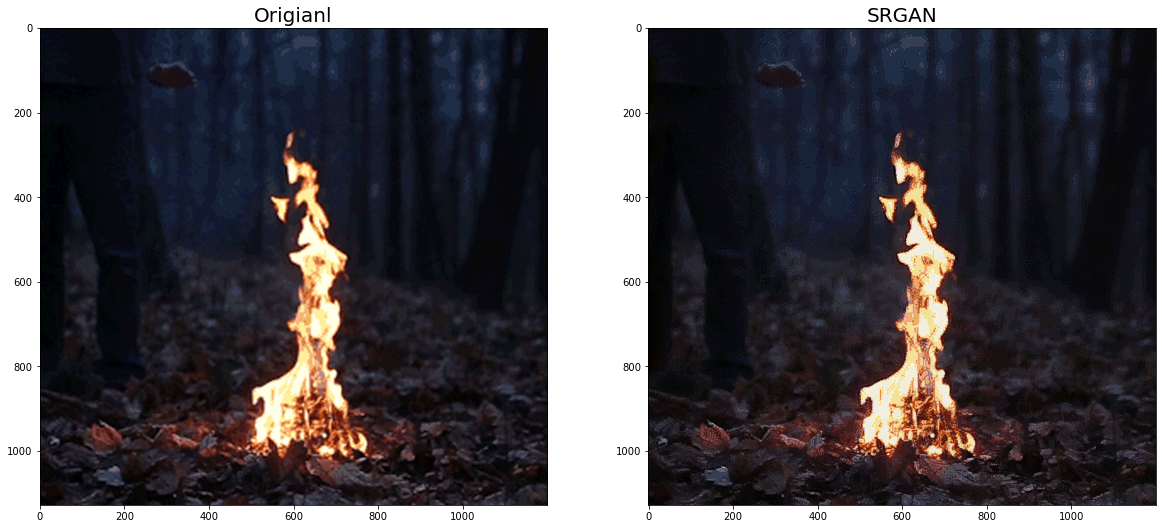

In [7]:
# 원본 및 srgan 화 된 파일을 시각화
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_first_gif_frame); plt.title("Origianl", fontsize=20)
plt.subplot(1,2,2); plt.imshow(srgan_first_gif_frame); plt.title("SRGAN", fontsize=20)

In [8]:
# crop 한 부분을 자세히 보면, 선명한지 확인가능할 것임
left_top = (400, 500)
original_crop = crop(bicubic_first_gif_frame, left_top)
srgan_crop = crop(srgan_first_gif_frame, left_top)
print(original_crop.shape)
print(srgan_crop.shape)

(200, 200, 3)
(200, 200, 3)


Text(0.5, 1.0, 'SRGAN')

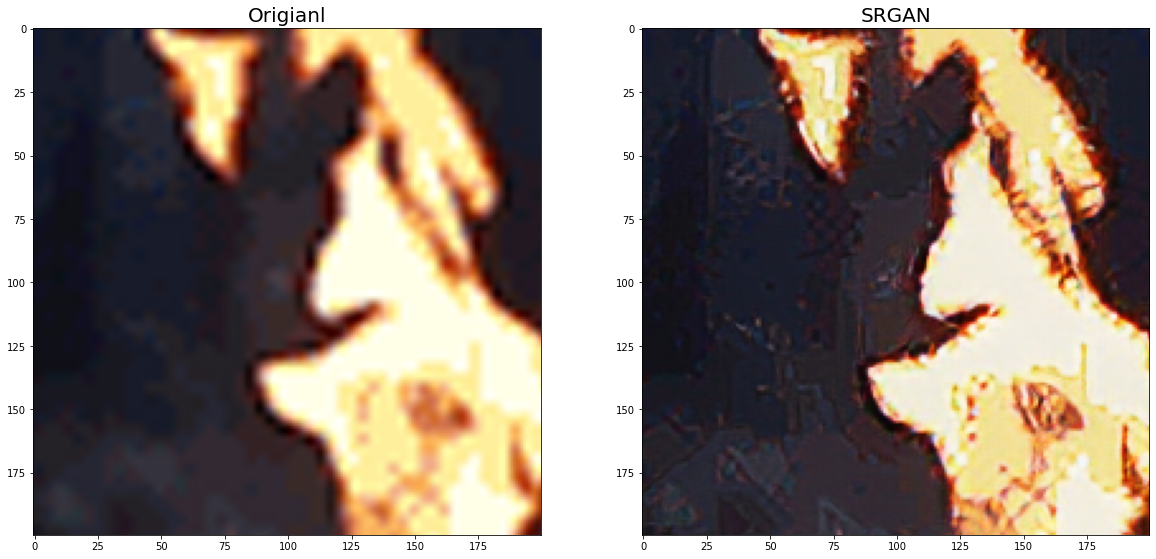

In [9]:
# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(original_crop); plt.title("Origianl", fontsize=20)
plt.subplot(1,2,2); plt.imshow(srgan_crop); plt.title("SRGAN", fontsize=20)

## 4. 프레임을 합쳐 gif 만들기


위에서 frame_sr을 만들었다면 아래 코드와 같이 gif 파일을 생성할 수 있습니다. Bicubic 및 SRGAN의 결과를 각각 저장하여 2개 파일을 만들어 주세요.

In [10]:
# bicubic gif 파일 만드는 함수 생성
def bicubic2gif():
    
    bicubic_isTrue = True
    bicubic_frames = []
    
    while bicubic_isTrue:
        
        bicubic_isTrue, bicubic_frame = gif.read()
        
        if bicubic_isTrue:
            
            bicubic_frame = cv2.cvtColor(bicubic_frame, cv2.COLOR_BGR2RGB)
            #print(bicubic_frame.shape)
            bicubic_frames.append(bicubic4ize(bicubic_frame))
            
    print("bicubic frame 수 :", len(bicubic_frames))
    print("bicubic frame 크기 :", (bicubic_frames[0].shape))
    
    #imageio.mimsave("/home/aiffel-dj25/aiffel/super_resolution/gif/bicubic.gif", bicubic_frames)
    imageio.mimsave("bicubic.gif", bicubic_frames)

    return

In [11]:
#생성!
#bicubic2gif()

In [12]:
# SRGAN gif 파일 만드는 함수 생성
def srgan2gif():
    
    srgan_isTrue = True
    srgan_frames = []
    
    while srgan_isTrue:
        
        srgan_isTrue, srgan_frame = gif.read()
        
        if srgan_isTrue:
            
            srgan_frame = cv2.cvtColor(srgan_frame, cv2.COLOR_BGR2RGB)
            #print(srgan_frame.shape)
            srgan_frames.append(srganize(srgan_frame))
            
    print("srgan_frames 수 :", len(srgan_frames))
    print("srgan_frames 크기 :", (srgan_frames[0].shape))
    
    imageio.mimsave("srgan.gif", srgan_frames)

    return

In [13]:
#생성!
#srgan2gif()

## 5. gif 이 잘 만들어졌는지 확인해보자



In [14]:
# gif를 display 해보자
from IPython.display import Image as show_gif

#show_gif("bicubic.gif", width=1000) # width 는 적당히 큰 값으로 설정해주세요

In [15]:
# gif를 display 해보자
from IPython.display import Image as show_gif

#show_gif("srgan.gif", width=1000) # width 는 적당히 큰 값으로 설정해주세요

## 6.루브릭


1. SRGAN을 이용해 고해상도의 이미지를 생성하였다.

 위 interpolation, SRGAN 고해상도 이미지 생성 및 gif 생성, 표시하였습니다.
 아 용량이 너무 커서 github 주소로 대체합니다.
 https://github.com/abidan-korea/aiffel/blob/main/exp/bicubic.gif
 https://github.com/abidan-korea/aiffel/blob/main/exp/srgan.gif

2. 다양한 해상도의 이미지에 대해 시각화를 통해 원본, SRGAN생성본, interpolation생성본을 비교분석하였다.

 첫 gif 프레임을 시각화하였습니다.

3. 저해상도 gif 동영상을 고해상도 동영상으로 성공적으로 변환하였다.

 성공적으로 변환하였습니다.
 gif 파일은 github에 업로드하였습니다.

## 7.회고

1. 불 이미지는 SRGAN 보다는 Bicubic 이 더 자연스러운 것 같다.

  기본적으로는 bicubic interpolation 로 복구하였을때 선명도도 떨어지고 해상도가 높게 보이지 않는다.
  
  개인적으로 불 영상을 좋아하기 때문에, 불을 선택하였다. 
  SRGAN 논문의 예제(경계가 확실한 호랑나비)처럼 경계 혹은 잔차(residual) 이 확실한 경우, 잘 작동하는 것 같다.
  그러나 불은 경계라는 것이 애매하다.
  게다가 원본 불 gif 는 어두운 숲속에서 불을 피웠기 때문에 주변과의 상호작용이 덜하다
  그리고 불이라는 것이 불이 통째로 하나가 아니라 작은 불길들의 집합이라고 생각하면,
  각 불길들이 중첩될때 그림자가 지거나, 경계가 명확하기 생기지 않고 자연스럽게 중첩되는 것 같다.
  
  SRGAN 을 통해서 불의 이미지를 복원하였더니 오히려 불의 경계가 생겨서 부자연스러움이 느껴진다.
  불의 특성인지, 불 영상의 특성인지는 모르겠으나,
  불 이미지는 경계가 확실하지 않다는 생각이 든다. 사람의 눈코입이나 건물 창문처럼 경계가 확실하지 않아서
  약간 어색하지 않나 생각이 든다.
  
2. 각 기능들을 최대한 함수화 시켜서 캡슐화시키려고 했는데 중간에 헷갈리는 부분이 있었다.
  
  다음에는 class 로 구현하고 instance 를 선언 후 몇줄 만에 끝내는 노드를 진행해보고 싶다는 욕심이 생겼다.

3. 재밌는 예제를 한 것 같아 살짝 설렜습니다.